In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import zipfile

%pip install plotly
import plotly.express as px

In [50]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [52]:
row=df.shape[0]
col=df.shape[1]
print(f" Total rows:{row} \n Total columns:{col}")

 Total rows:150 
 Total columns:5


In [53]:
#preprocessing
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [55]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
#encoding species(object) col into number for building algorithm 
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [57]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i]=le.fit_transform(df[i])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


<ipython-input-59-ad5a27fffb6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',data=df,palette="Set2")


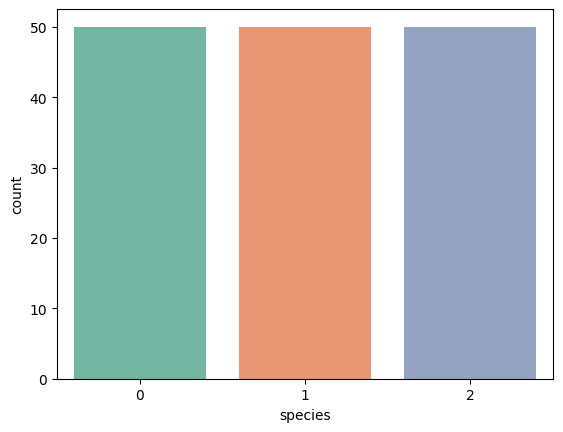

In [59]:
#to check count of species category
sns.countplot(x='species',data=df,palette="Set2")
plt.show()


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

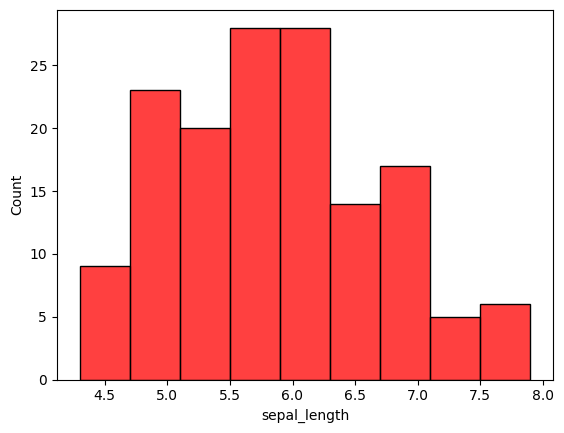

In [60]:
#sepal length
sns.histplot(data=df,x=df.sepal_length,color='red')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

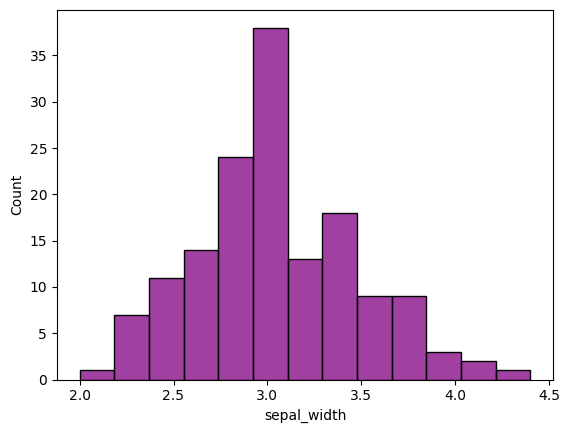

In [61]:
sns.histplot(x=df.sepal_width,data=df,color='purple')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

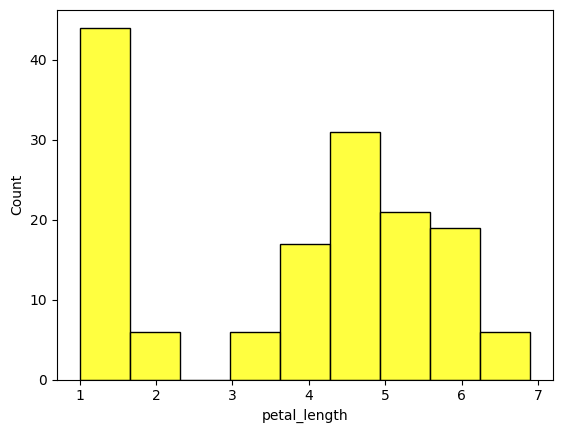

In [62]:
sns.histplot(x=df.petal_length,data=df,color='yellow')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

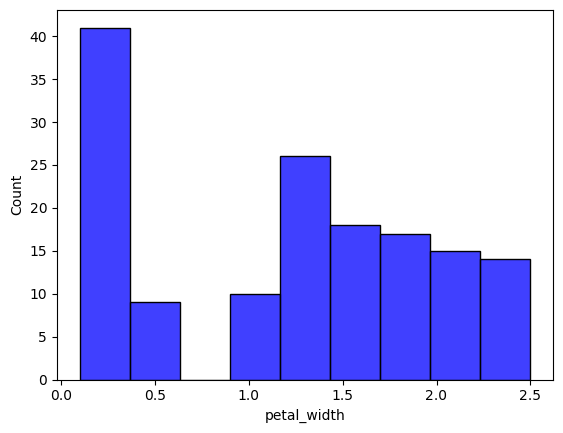

In [63]:
sns.histplot(data=df,x=df.petal_width,color='blue')

<AxesSubplot:>

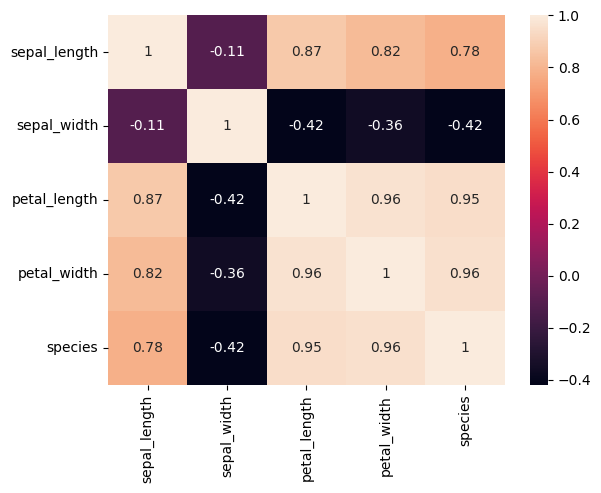

In [64]:
sns.heatmap(df.corr(),annot=True)

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [67]:
x=df.drop(['species'],axis=1)
y=df.species

In [68]:
print(x)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [69]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
print(f"x_test : {x_test.head()}",f" \n x_train : {x_train.head()}")

x_test :      sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8
80            5.5          2.4           3.8          1.1
143           6.8          3.2           5.9          2.3
65            6.7          3.1           4.4          1.4
47            4.6          3.2           1.4          0.2  
 x_train :      sepal_length  sepal_width  petal_length  petal_width
133           6.3          2.8           5.1          1.5
117           7.7          3.8           6.7          2.2
33            5.5          4.2           1.4          0.2
89            5.5          2.5           4.0          1.3
8             4.4          2.9           1.4          0.2


In [72]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
print("score for Training data :",model.score(x_train,y_train))
print("score for testing data :",model.score(x_test,y_test))

score for Training data : 0.9714285714285714
score for testing data : 0.9555555555555556


In [74]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=300,random_state=100)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [75]:
print("score for Trained data : ",model2.score(x_train,y_train))
print("score for tested data : ",model2.score(x_train,y_train))

score for Trained data :  1.0
score for tested data :  1.0


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
print("score for the trained data :",model3.score(x_train,y_train))
print("score for the tested data :",model3.score(x_test,y_test))

score for the trained data : 0.9809523809523809
score for the tested data : 1.0


In [78]:
#model training
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
data={"sepal_length " :[5.2],"sepal_width":[3.6],"petal_length":[1.4],"petal_width":[0.2]}

In [88]:

data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)
result = model.predict(trail)
print("Result Species:", result[0])
     

Result Species: 0
